# Exploratory Data Analysis for the Taiwan Default Credit data set 

## Imports 

In [1]:
import numpy as np
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

## Reading the data 

In [2]:
#reading the raw dataframe 
default_credit_df = pd.read_csv('../data/raw/default_credit_card_clients.csv')

#setting ID as target class 'default payment next month'
default_credit_df = default_credit_df.set_index('ID').rename(
    columns = {'default payment next month': 'default_payment_next_month'})

-----

## Summary of the data set

This project aims to build a classification model using Logisitic regression algorithm to predict potential credit default accounts of Taiwan's credit card clients'. The data set is dated from April to September, 2005 sourced from the UCI machine learning repository and can be found [here](https://archive-beta.ics.uci.edu/ml/datasets/default+of+credit+card+clients). The data set consists of 23 features column and one target column. It contains information on credit holders and the kind of translations they are making with their bank in Taiwan, the target column is whether the client will make a default payment next month or not. 

There are 30,000 observations in the data set and 23 features. There are no missing values in the data set. The table below shows the number of clients who made a default payment next month, along with those who did not make a default payment. 

|Default Payment next month = 0|Default Payment next month = 1|
|------|------|
|23364|6636|

Table 1. Counts of observation for each class in the target column.

In [3]:
# class count 
default_credit_df['default_payment_next_month'].value_counts()

0    23364
1     6636
Name: default_payment_next_month, dtype: int64

In [4]:
# default_credit_df information
default_credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
# default_credit_df column summary
default_credit_df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


## Partition the data set into training and test sets

Before proceeding further, we will split our data set into train and test set. 20% of the observations will be included in the test data and 80% in the train data set. Overall `default_of_credit_card_clients` has 30,000 observations, thus the test set should have enough examples to provide good affirmation for the model: more precisely, the train set will have 24000 observations, and test set 6000.

Also, throughout the data analysis `random_state=123` will be used to make sure the results are consistent.

Worthy to note that no EDA will be performed on test data set, as test set is going to serve for the generalization of the model (unseen data for our model).

In [6]:
# splitting the dataset into train and test sets
train_df, test_df = train_test_split(default_credit_df, test_size=0.2, random_state=123)

In [7]:
# printing the number of observations for train and test sets
print('The number of observations for train set: ', train_df['default_payment_next_month'].shape[0])
print('The number of observations for test set: ', test_df['default_payment_next_month'].shape[0])

The number of observations for train set:  24000
The number of observations for test set:  6000


In [8]:
# percentage of zeros and ones in default column train set
train_percent_defaults = train_df['default_payment_next_month'].value_counts(normalize=True) * 100
train_percent_defaults.name = 'Default Count Percent'

# count of observations were default is one or zero in train set 
train_yes_default = len(train_df[train_df['default_payment_next_month'] == 1])
train_no_default = len(train_df[train_df['default_payment_next_month'] == 0])

In [9]:
# convert to a dataframe and make column names readable
default_percent_df = pd.DataFrame(train_percent_defaults)
default_percent_df = default_percent_df.rename(index = {0: 'No (0)', 1: 'Yes (1)'})

# make a dictionary of classes count values 
count_dic_no = {"Count": train_no_default 
               }

count_dic_yes = {"Count": train_yes_default
                }

# make a list from classes default payment counts 
list_default = [count_dic_no, count_dic_yes]

# convert to a dataframe
default_count = pd.DataFrame(list_default, index = ['No (0)', 'Yes (1)'])

# join two dataframes
df_default = default_percent_df.join(default_count)
df_default

,Default Count Percent,Count
No (0),77.783333,18668
Yes (1),22.216667,5332


The count, as well as percentage of overall distribution of classes indicates that there is an imbalance between `No (0)` and `Yes (1)` classes. But first, we would like to observe the impact of imbalance on the classification results using plain Logisitic regression. The scores achieved with imbalance data will act as baseline/reference for us and would help us deploy different techniques to achieve scores better than these reference scores. 
Accuracy will not be the best metric to use in this case for evaluation of model as it can be misleading, so we would be using metrics such as a Confusion Matrix, Precision, Recall, and F1. Using such scoring, clearly indicates the misclassifications done by model. We will also deploy one of the techniques to handle imbalance dataset which is Penalized learning algorithms (Cost sensitive Logistic regression i.e. using class_weight parameter).This algorithms penalizes mistakes on the minority class by an amount proportional to how under-represented that class is. This algorithm would assign higher weights to the minority class, in our case `Yes (1)`, and lower weights to the majority class, in our case `No (0)`, to balance out the class representation while training the model and hence would resolve the problem of imbalance.

## Exploratory analysis on the training data set

Here we will explore each feature and exactly how they could contribute to the decision making and prediction within the model. First we will analyze the distribution of all the numeric features by looking at their histograms, along with that we will also be categorizing them based on the two classes in the target column, which are: `Yes (1)` (default payment was made) and `No (0)` (default was not made). 

Here we will be mainly looking at how the target classes overlap with each other for each feature. Additionally, we will also be comparing how the distribution of each target class in all features. In general, assuming that there is no class imbalance, less overlap and different distributions in the target classes, would indicate to creating a more realistic model, this is because the model would be able to easily classify the target classes given the differences in the distributions for that feature.

In Figure 1, we see that most of the features show no major overlap between the target classes, however in our case this could be because of the fact that there is a class imbalance. In Figure 1, we also observe that the distribution of the target classes are very similar to each other, we see that the spread and skewness of the distribution are alike. At this moment, because of the class imbalance it very to tell which numeric features would a play a more important role in the decision making of the model. 

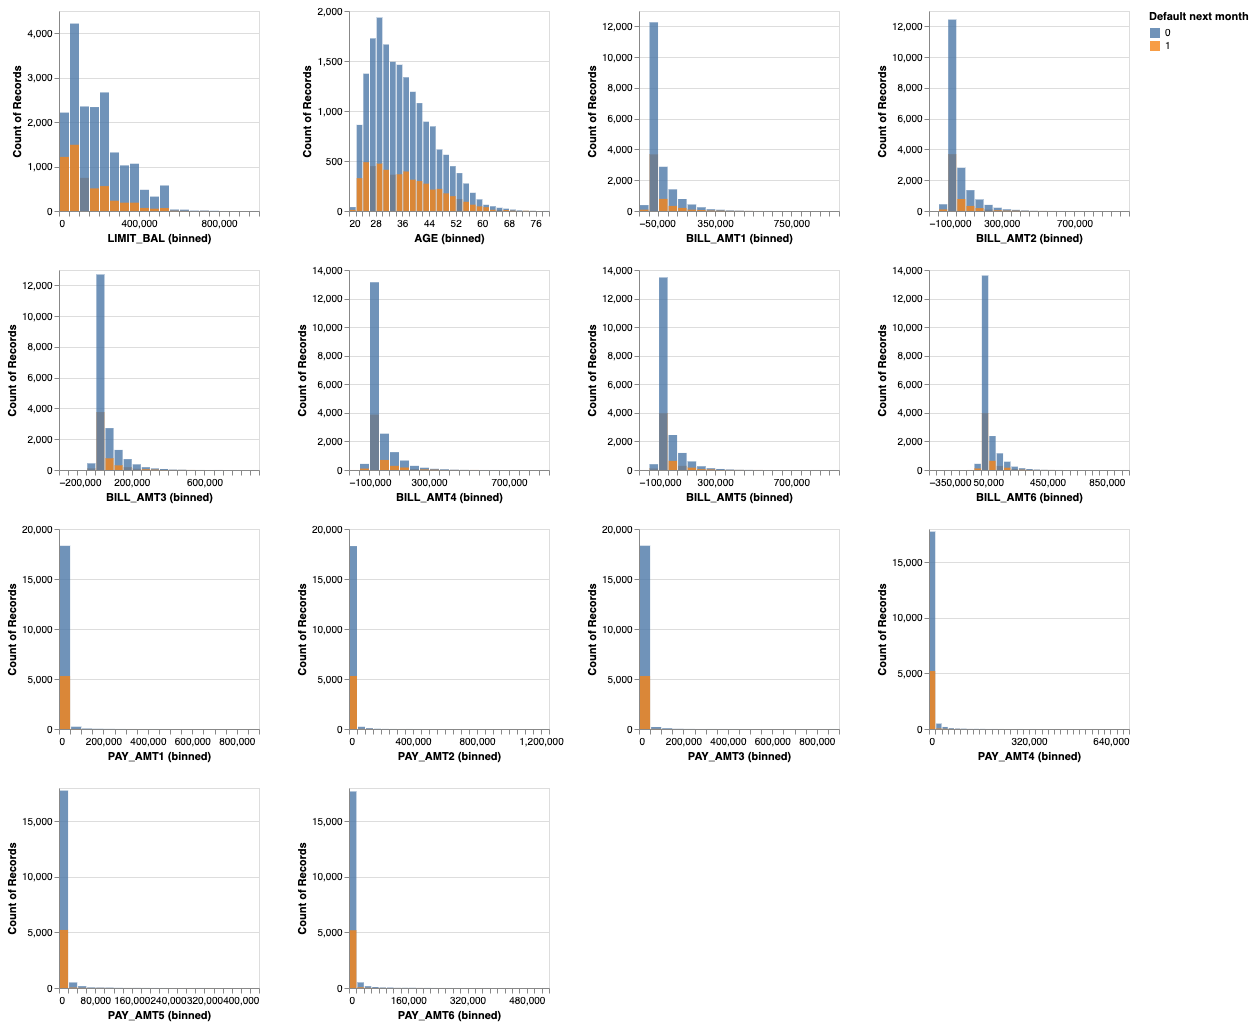

In [10]:
#making a copy of the train_df for visualizations
train_df_viz = train_df.copy(deep =True)

#changing data type of "default_payment_next_month" to string in order categorize it properly
train_df_viz["default_payment_next_month"] = train_df_viz["default_payment_next_month"].apply(str)

#plotting the histograms
alt.Chart(train_df_viz).mark_bar(opacity = 0.8).encode(
     alt.X(alt.repeat(), type='quantitative', bin=alt.Bin(maxbins=40), scale= alt.Scale(zero= False)),
     y=alt.Y('count()', stack = False),
     color = alt.Color("default_payment_next_month", title = "Default next month")
).properties(
    width=200,
    height=200
).repeat(
    ["LIMIT_BAL", "AGE", "BILL_AMT1", "BILL_AMT2", "BILL_AMT3", 
     "BILL_AMT4", "BILL_AMT5", "BILL_AMT6",
     "PAY_AMT1",  "PAY_AMT2",  "PAY_AMT3", "PAY_AMT4",
      "PAY_AMT5", "PAY_AMT6"],
    columns =4
)

Figure 1: Comparing the distributions for all numeric features with each target feature using histograms 

  

Similarly, In Figure 2 we compare the proportions of each category in the ordinal and categorical features of the data set, we separate them by the target classes. Instead of looking at the histograms, we instead are looking at the bar graphs of the categorical and ordinal features. Again we see a similar conclusion where because of the class imabalance, it hard to say which features would play a more important role in the decision making process. 

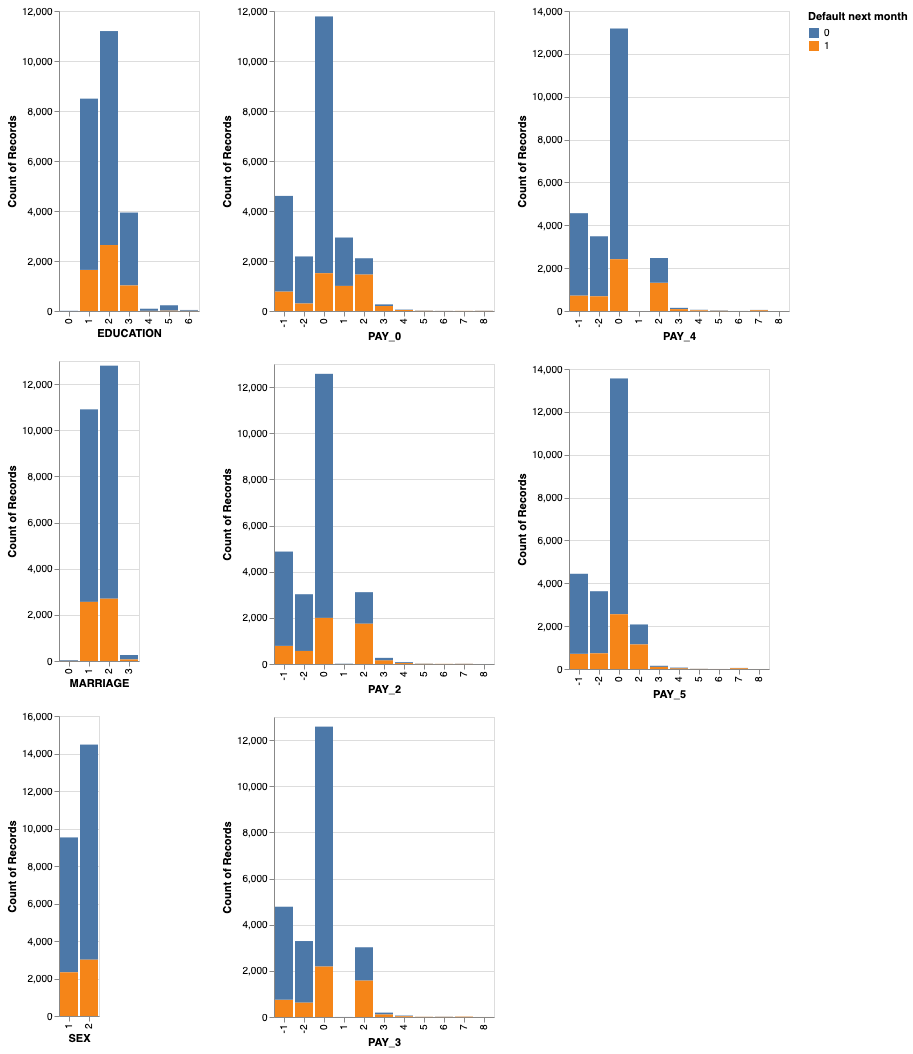

In [11]:
#Storing the categorical and ordinal features seperately in a list 
categorical = ["EDUCATION", "MARRIAGE", "SEX", "PAY_0", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6"]

#creating a list to store all the bar graphs
categorical_graph = []

#creating all the bar graphs
for i in range(len(categorical)):
    train_df_viz[categorical[i]] = train_df_viz[categorical[i]].apply(str)
    cate = alt.Chart(train_df_viz).mark_bar().encode(
        y= "count()",
        x = categorical[i],
        color = alt.Color("default_payment_next_month", title = "Default next month")
    )
    categorical_graph.append(cate)
    
#showing all the bar graphs together 
(categorical_graph[0] & categorical_graph[1] & categorical_graph[2]) | (categorical_graph[3] & categorical_graph[4] & categorical_graph[5]) | (categorical_graph[6] & categorical_graph[7])

Figure 2: Comparing the distributions for all categorical and ordinal features with each target feature using bar graphs    


The visualization in Figure 3 is more to explore how clients spend and pay their monthly credit, we are interested to see if there is any sort of correlation or pattern between those features. In order to avoid overplotting due to high amount of data points in the train data, instead of plotting a scatter plot, we have instead plotted a 2D histogram heat map. On the y-axis you will see binned `bill` months from months April(1) to September(6). Similarly, on the x-axis you will observe binned `payment` amounts for each month. A darker color for a bin represents higher counts. 

From the plots below, one thing that is interesting to note is that the highest amount of counts are for clients that have spent and paid between 0 - 50,000 in credit for each month. Consequently we also see a kind of negative correlation between pay amounts and bill amounts for each month. This means that people who are spending higher amounts of money are unlikely to pay it back on time. 

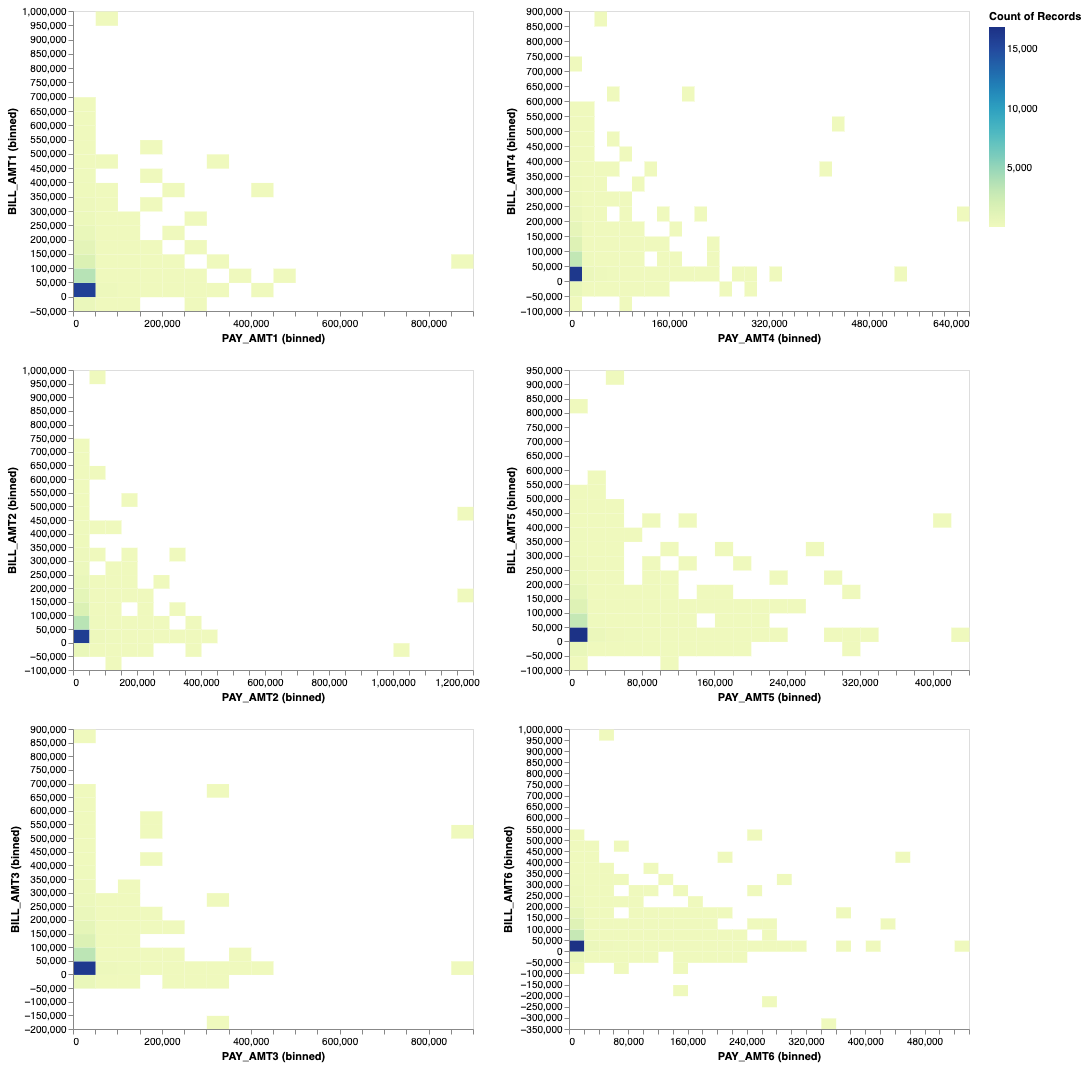

In [12]:
#storing all the pay and bill amount columns
pay = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5', 'PAY_AMT6']
bill = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5', 'BILL_AMT6']

#creating a list to store all the heatmaps
graph = []

#plotting and storing bill and payment heat maps
for i in range(len(bill)):
    month = alt.Chart(train_df).mark_rect().encode(
        alt.X(pay[i], bin=alt.Bin(maxbins=40)),
        alt.Y(bill[i], bin=alt.Bin(maxbins=40)),
        alt.Color('count()'))
    graph.append(month)

#showing all the heat maps together 
(graph[0] & graph[1] & graph[2]) | (graph[3] & graph[4] & graph[5])   

Figure 3: Correlation plots for bill and pay amounts for each month from April to September, 2005 